In [1]:
import sys 
# sys.path.append('/Users/geenaildefonso/Projects/NERM')
sys.path.append('../../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
# print(sys.path)
from model_files.nerm import model as model
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# from necro_pydream_model_file_8920 import model
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from scipy.stats import norm,uniform
import seaborn as sns
from matplotlib import pyplot as plt
import random
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from scipy import stats
from pysb.simulator import SimulationResult
import pandas as pd
import seaborn as sns
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [2]:
mode1_100 = np.load('../../param_files/necro_pars10k_cluster0_5720_mod.npy')
mode2_100 = np.load('../../param_files/necro_pars10k_cluster1_5720_mod.npy')
mode3_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')
mode4_100 = np.load('../../param_files/necro_pars10k_cluster3_5720_mod.npy')
pars = np.load('../../param_files/necro_pars10k_allclusmod.npy')

In [3]:
tspan = np.linspace(0, 1440, 1441)

In [11]:
solverwtm3 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm3 = solverwtm3.run(param_values=mode3_100, num_processors = 20)
m3alldf100wt = wtm3.dataframe

2021-12-08 17:41:43.755 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-08 17:41:43.770 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-08 17:41:43.847 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-08 17:41:44.008 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-08 17:43:20.551 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-08 17:43:20.553 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-08 17:43:22.461 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


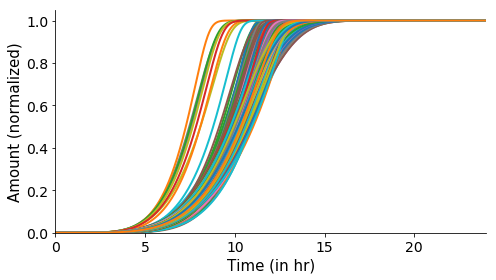

In [13]:
fig, ax = plt.subplots(figsize = (7, 4))
for n in range(len(mode3_100)):
    plt.plot(tspan/60, m3alldf100wt.loc[n]['MLKLa_obs'].iloc[:]/m3alldf100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
# ax.set_xticks([0, 5, 10, 15, 20, 24])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 

In [4]:
solverwtm3 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
wtm3 = solverwtm3.run(param_values=mode3_100[0], num_processors = 20)
m3df100wt = wtm3.dataframe

2021-12-07 16:50:28.979 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2021-12-07 16:50:29.694 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2021-12-07 16:50:29.800 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2021-12-07 16:50:29.851 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2021-12-07 16:50:30.138 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2021-12-07 16:50:30.140 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2021-12-07 16:50:30.207 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


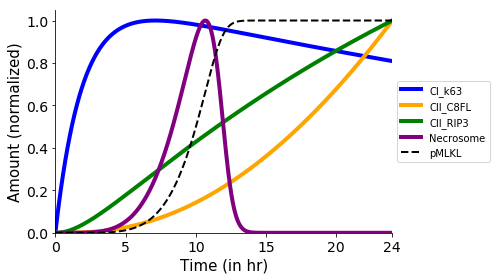

In [10]:
fig, ax = plt.subplots(figsize = (7, 4))
plt.plot(tspan/60, m3df100wt['CI_k63_obs'].iloc[:]/m3df100wt['CI_k63_obs'].iloc[:].max(), label = 'CI_k63',color = 'blue', lw=4)
plt.plot(tspan/60, m3df100wt['CII_C8a_obs'].iloc[:]/m3df100wt['CII_C8a_obs'].iloc[:].max(), label = 'CII_C8FL',color = 'orange',lw=4)
plt.plot(tspan/60, m3df100wt['CII_RIP3_obs'].iloc[:]/m3df100wt['CII_RIP3_obs'].iloc[:].max(), label = 'CII_RIP3',color = 'green',lw=4)
plt.plot(tspan/60, m3df100wt['RIP1RIP3unmod_obs'].iloc[:]/m3df100wt['RIP1RIP3unmod_obs'].iloc[:].max(), label = 'Necrosome',color = 'purple',lw=4)
plt.plot(tspan/60, m3df100wt['MLKLa_obs'].iloc[:]/m3df100wt['MLKLa_obs'].iloc[:].max(),label = 'pMLKL', linestyle = '--',color = 'black',lw=2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)

ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#           ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
# plt.savefig('nerm_mode3_dynamics_CI_CII_necro_pmlkl.pdf')
plt.show() 